In [65]:
import string # library used to deal with some text data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # plotting library


In [66]:
df = pd.read_csv("/Users/User/Desktop/ML0000/python/8/winequality-red.csv")
display(df.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [67]:
df.isnull().sum()

fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
chlorides           0
                   ..
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
Length: 12, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [69]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


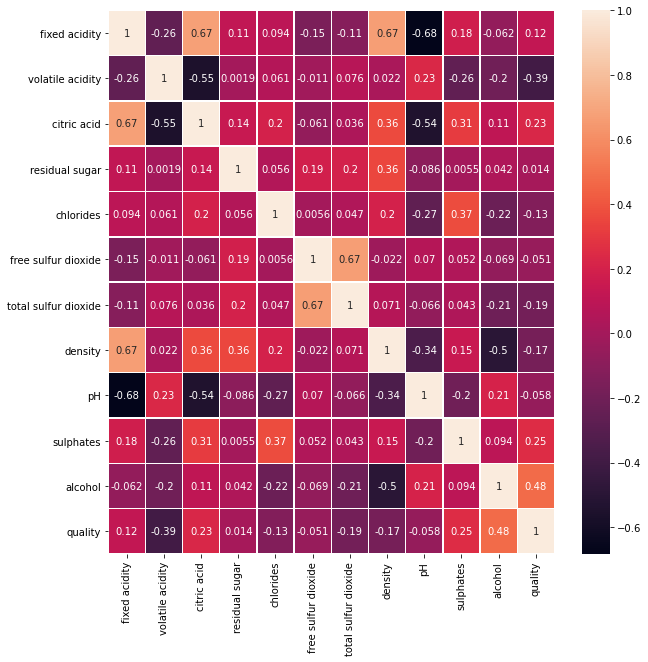

In [70]:
fig, ax = plt.subplots(figsize=(10,10))         # Samplefigsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [71]:
df["quality"] = pd.cut(df["quality"],bins=[0,6.5,10],labels=["Good","Bad"])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Good


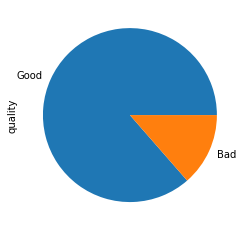

In [72]:
df.quality.value_counts().plot(kind='pie')

In [73]:
from sklearn.cluster import KMeans
from sklearn import preprocessing,svm,neighbors
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
df=df[["quality","alcohol","sulphates","citric acid","fixed acidity","residual sugar"]]
X=df.drop(["quality"],1)
y=df["quality"]

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
#lnr=LinearRegression()
lr=LogisticRegression()
knn=neighbors.KNeighborsClassifier(n_neighbors = 5) 
svm0=svm.SVC(random_state = 1)
nb=GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 3000, random_state = 1)

#lnr.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm0.fit(X_train,y_train)
nb.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rf.fit(X_train,y_train)

accuracy={}
#accuracy["LinearRegression"]=lnr.score(X_test,y_test)*100
accuracy["Logisticregression"]=lr.score(X_test,y_test)*100
accuracy["Knn"]=knn.score(X_test,y_test)*100
accuracy["SVM"]=svm0.score(X_test,y_test)*100
accuracy["Naive Bayes"]=nb.score(X_test,y_test)*100
accuracy["Random Forest"]=rf.score(X_test,y_test)*100
print(accuracy)

{'Logisticregression': 89.375, 'Knn': 89.0625, 'SVM': 90.0, 'Naive Bayes': 87.1875, 'Random Forest': 93.125}


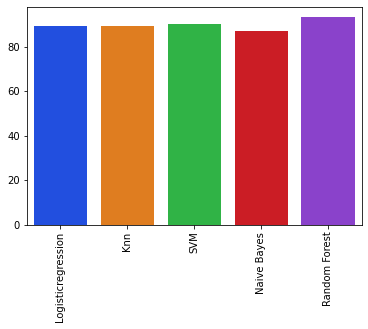

In [75]:
p=sns.barplot(list(accuracy.keys()),list(accuracy.values()),palette="bright")
_=plt.setp(p.get_xticklabels(),rotation=90)
plt.show()